In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
# Read in the image and print out some stats
image = mpimg.imread('test.jpg')
print('This image is: ', type(image), 'with dimension:', image.shape)

This image is:  <class 'numpy.ndarray'> with dimension: (540, 960, 3)


In [36]:
# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]

# Note: always make a copy rather than simly using "="
color_select= np.copy(image)
line_image = np.copy(image)

In [37]:
# Define our color selection criteria
# Note: if you run this code, you'll find these are not sensible values!!
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [38]:
# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]

In [39]:
# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)


In [40]:
print(fit_left)

[ -4.61052632e-01   5.39000000e+02]


In [41]:
# Identify pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) \
             | (image[:,:,1] < rgb_threshold[1]) \
             | (image[:,:,2] < rgb_threshold[2])

In [42]:
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [43]:
# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

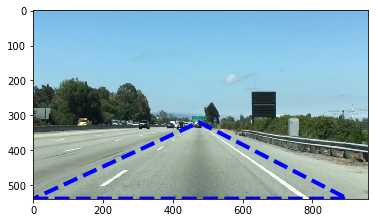

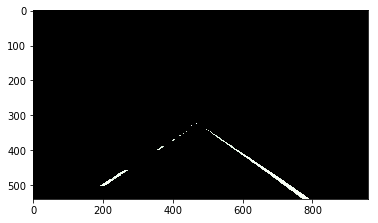

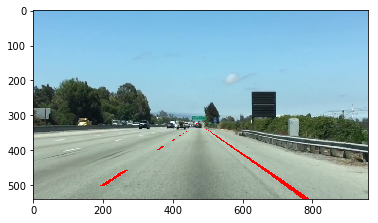

In [44]:
# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.show()
plt.imshow(color_select)
plt.show()
plt.imshow(line_image)
plt.show()